# Compare Networks #
# ================ #
 This notebook will show how to load PPI networks in gt.
 It also include some analyses to visualize how different are the PPI networks

In [1]:
# Load Libraries
# ==============
import os
from os.path import join

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd
import graph_tool.all as gt

import pdb

In [2]:
# Load PPI Networks
# =================
allnets = ['string', 'hippie', 'genemania', 'mist']
inpath = os.getcwd()
gtnets = dict()
for cnet in allnets:
    print(f'> Loading '+cnet+' network..')
    cpath = join(inpath,'ppi-networks', cnet+'_PPI_graph-tool.gt')
    gtnets[cnet] = gt.load_graph(cpath)
    print(gtnets[cnet]) 


> Loading string network..
<Graph object, undirected, with 16395 vertices and 277567 edges, 1 internal vertex property, 2 internal edge properties, 3 internal graph properties, at 0x7f5f47cb8b50>
> Loading hippie network..
<Graph object, undirected, with 17954 vertices and 389703 edges, 1 internal vertex property, 2 internal edge properties, 3 internal graph properties, at 0x7f5f846684c0>
> Loading genemania network..
<Graph object, undirected, with 17834 vertices and 550346 edges, 1 internal vertex property, 2 internal edge properties, 3 internal graph properties, at 0x7f5f47ccf070>
> Loading mist network..
<Graph object, undirected, with 18989 vertices and 480979 edges, 1 internal vertex property, 2 internal edge properties, 3 internal graph properties, at 0x7f5f47ccf5e0>


----------------------
> Print VENN diagram of genes at each PPI
----------------------


<ipython-input-3-c5425e2f4a12>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


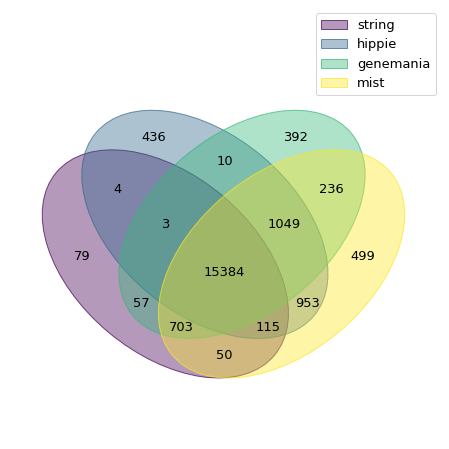

In [3]:
# Compare gene overlap
# ====================
from venn import venn
%matplotlib inline

print(f'----------------------')
print(f'> Print VENN diagram of genes at each PPI')
print(f'----------------------')

#  - Create dict for Venn diagram plotting
genesmod = dict()
for cnet in gtnets:
    allvrtx = [ gtnets[cnet].vp.genename[x] for x in gtnets[cnet].iter_vertices() ]
    genesmod[cnet] = set(allvrtx)

# - Printing VENN diagram
plot = venn(genesmod)
fig = plot.get_figure()

fig.show()

   

----------------------
> Print histogram edge distribution per PPI
----------------------


<AxesSubplot:xlabel='Edges', ylabel='Probability'>

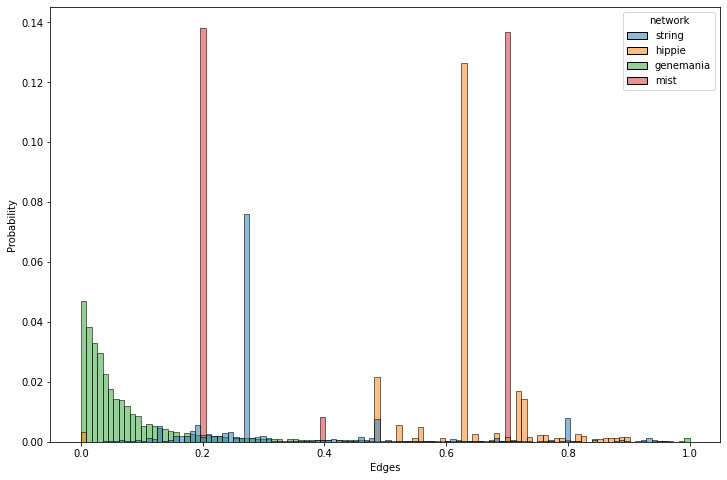

In [4]:
# Compare edge/link distribution between PPI
# ==========================================
print(f'----------------------')
print(f'> Print histogram edge distribution per PPI')
print(f'----------------------')
toplot = pd.DataFrame(columns =['Edges'])
for cnet in gtnets:
    alledges = [ gtnets[cnet].ep.weight[cedge] for cedge in gtnets[cnet].edges() ]
    tmpedges = np.array(alledges)
    tmpdf = pd.DataFrame(data = tmpedges, columns=['Edges']).assign(network = cnet)
    toplot = pd.concat([toplot, tmpdf])
    
# - Plot
fig,ax = plt.subplots(1,1,figsize=(12, 8))
sns.histplot(data = toplot, x = 'Edges', binrange=[0,1],
             hue = 'network', stat='probability')

----------------------
> Study gene neighbourhood (i.e degree)
----------------------

> Compute PPI networks degree (weighted and un-weighted)..

> Compute ratio weighted/un-weighted degree (weighted and un-weighted)..

> Plot un-weighted degree distribution

> Plot weighted degree distribution

> Plot degree ratio distribution


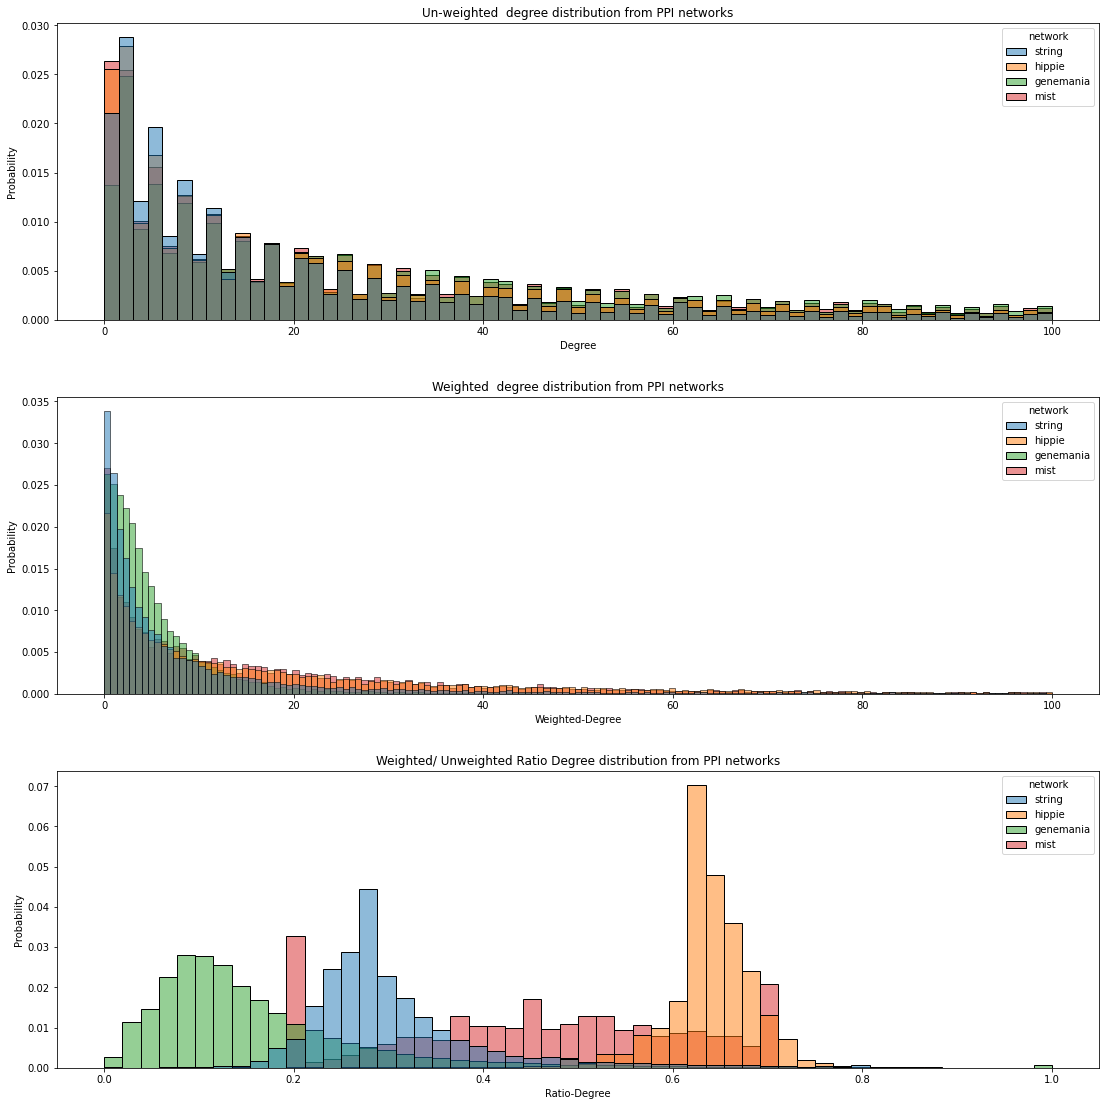

In [5]:
# Compare gene neighbourhood
# ==========================
%matplotlib inline
print(f'----------------------')
print(f'> Study gene neighbourhood (i.e degree)')
print(f'----------------------')

# - Compute node (weighted and un-weighted)
print(f'\n> Compute PPI networks degree (weighted and un-weighted)..')
for cnet in gtnets:
    gtnets[cnet].vp.degree = gtnets[cnet].degree_property_map("total", weight = None)
    gtnets[cnet].vp.wdegree = gtnets[cnet].degree_property_map("total",
                                                               weight = gtnets[cnet].edge_properties['weight'])
# - Compute ratio degree (weighted/unweighted)
print(f'\n> Compute ratio weighted/un-weighted degree (weighted and un-weighted)..')
for cnet in gtnets:
    vprop =gtnets[cnet].new_vertex_property("double")
    gtnets[cnet].vp.ratiodegree = vprop
    for cvtx in gtnets[cnet].iter_vertices():
        gtnets[cnet].vp.ratiodegree[cvtx] = gtnets[cnet].vp.wdegree[cvtx] / gtnets[cnet].vp.degree[cvtx]

# - Prepare plotting scheme
fig,ax = plt.subplots(3,1,figsize=(16, 16))
fig.set_tight_layout({'pad': 3})

# - Plot un-weighted degree
print(f'\n> Plot un-weighted degree distribution')
toplot = pd.DataFrame(columns =['Degree'])
for cnet in gtnets:
    alldegree = [ gtnets[cnet].vp.degree[cvtx] for cvtx in gtnets[cnet].iter_vertices()]
    tmpdegree = np.array(alldegree)
    tmpdf = pd.DataFrame(data = tmpdegree, columns=['Degree']).assign(network = cnet)
    toplot = pd.concat([toplot, tmpdf],ignore_index=True)
    
sns.histplot(data = toplot, x = 'Degree', binrange=[0,100],
             hue = 'network', stat='probability', ax = ax[0])
ax[0].title.set_text('Un-weighted  degree distribution from PPI networks')


# - Plot weighted degree
print(f'\n> Plot weighted degree distribution')
toplot = pd.DataFrame(columns =['Weighted-Degree'])
for cnet in gtnets:
    alldegree = [ gtnets[cnet].vp.wdegree[cvtx] for cvtx in gtnets[cnet].iter_vertices()]
    tmpdegree = np.array(alldegree)
    tmpdf = pd.DataFrame(data = tmpdegree, columns=['Weighted-Degree']).assign(network = cnet)
    toplot = pd.concat([toplot, tmpdf],ignore_index=True)
    
sns.histplot(data = toplot, x = 'Weighted-Degree', binrange=[0,100],
             hue = 'network', stat='probability', ax = ax[1])
ax[1].title.set_text('Weighted  degree distribution from PPI networks')

# - Plot weighted/unweighted degree ratio
print(f'\n> Plot degree ratio distribution')
toplot = pd.DataFrame(columns =['Ratio-Degree'])
for cnet in gtnets:
    alldegree = [ gtnets[cnet].vp.ratiodegree[cvtx] for cvtx in gtnets[cnet].iter_vertices()]
    tmpdegree = np.array(alldegree)
    tmpdf = pd.DataFrame(data = tmpdegree, columns=['Ratio-Degree']).assign(network = cnet)
    toplot = pd.concat([toplot, tmpdf], ignore_index=True)
    
sns.histplot(data = toplot, x = 'Ratio-Degree', binrange=[0,1],
             hue = 'network', stat='probability', ax = ax[2])
ax[2].title.set_text('Weighted/ Unweighted Ratio Degree distribution from PPI networks')
                                                             

----------------------
> Study link-level similarity between PPIs
----------------------
We will compute the DICE score of neighbour, for each vertex between all PPI networks
I.e get one vertex in one network and its neighbours, same vertex in all other networks and
all its neighbours, and compute the overlapping of neighbours
----------------------

> Computing edge DICE score betweenstring and all PPIs
    string vs hippie
    string vs genemania
    string vs mist

> Computing edge DICE score betweenhippie and all PPIs
    hippie vs string
    hippie vs genemania
    hippie vs mist

> Computing edge DICE score betweengenemania and all PPIs
    genemania vs string
    genemania vs hippie
    genemania vs mist

> Computing edge DICE score betweenmist and all PPIs
    mist vs string
    mist vs hippie
    mist vs genemania


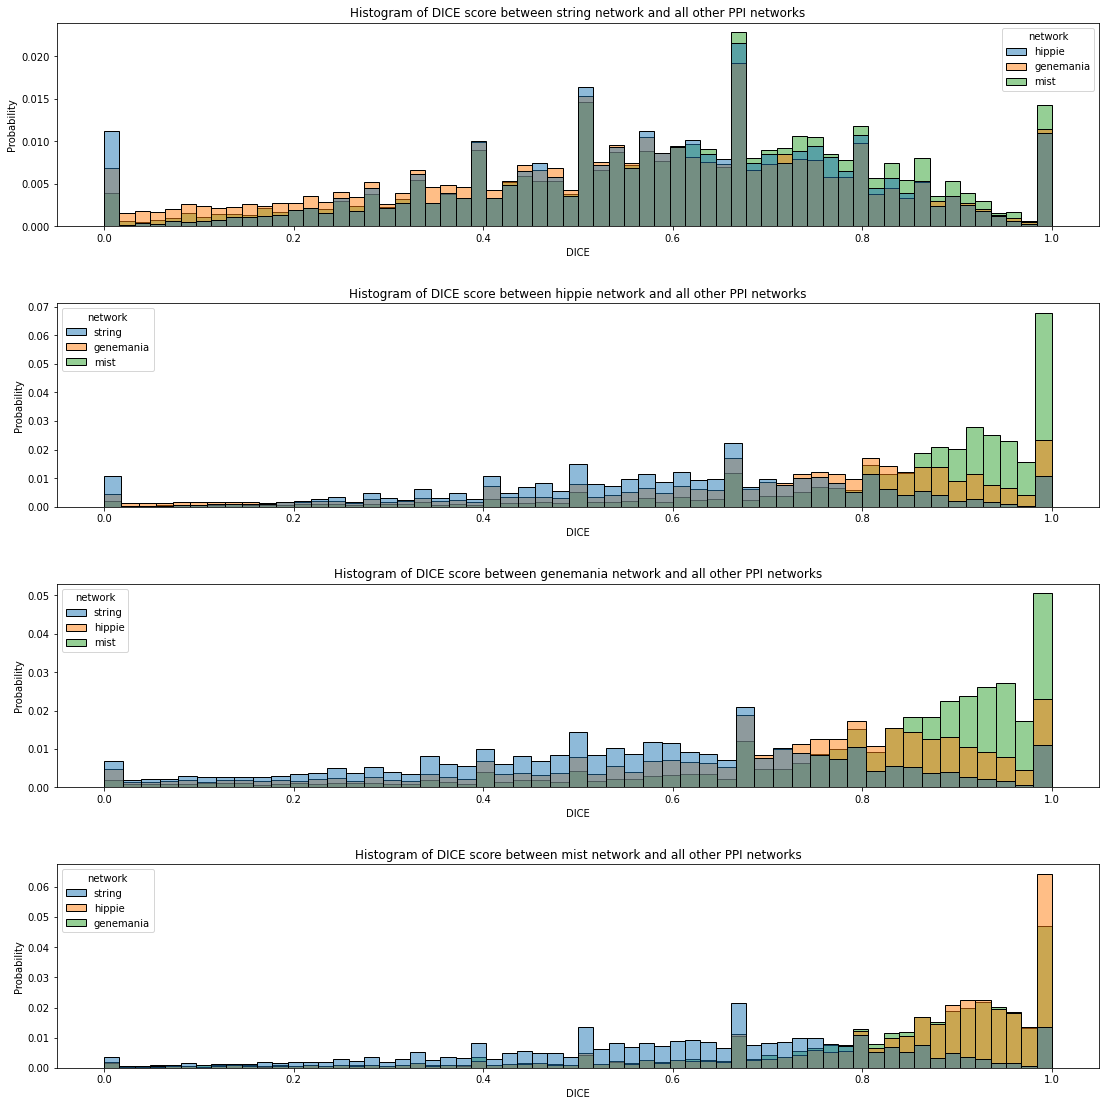

In [6]:
# Link-level similarity
# =====================
%matplotlib inline
print(f'----------------------')
print(f'> Study link-level similarity between PPIs')
print(f'----------------------')
print(f'We will compute the DICE score of neighbour, for each vertex between all PPI networks')
print(f'I.e get one vertex in one network and its neighbours, same vertex in all other networks and')
print(f'all its neighbours, and compute the overlapping of neighbours')
print(f'----------------------')

# Pre-set printing
numnets = len(gtnets)
fig,ax = plt.subplots(numnets,1,figsize=(numnets*4, 16))
fig.set_tight_layout({'pad': 3})

# Getting all networks gene-names
dictgenes = dict()
for cnet in gtnets:
    dictgenes[cnet] = [ gtnets[cnet].vp.genename[cgene] for cgene in gtnets[cnet].iter_vertices()]

# Iterate over all nets
for idx,cnet in enumerate(gtnets):
    print(f'\n> Computing edge DICE score between'+cnet+' and all PPIs')
    othernets = [xx for xx in gtnets if xx != cnet]        # get other nets name    
    
    # Compare current network vs all other networks
    toplotdf = pd.DataFrame(columns=['DICE'])
    for cothernet in othernets:
        print(f'    '+cnet+' vs '+cothernet)
        currothergenes = dictgenes[cothernet]
        # Loop over all genes selected network
        currdice = list()
        for cgene in dictgenes[cnet]:
            if cgene in currothergenes:
                # Find vertices bot
                v1 = gt.find_vertex(gtnets[cnet], gtnets[cnet].vp.genename, cgene)[0]
                v2 = gt.find_vertex(gtnets[cothernet], gtnets[cothernet].vp.genename, cgene)[0]
                
                # Find vertices neighbours
                neighv1 = [gtnets[cnet].vp.genename[vv] for vv in gtnets[cnet].get_out_neighbors(v1)]
                neighv2 = [gtnets[cothernet].vp.genename[vv] for vv in gtnets[cothernet].get_out_neighbors(v2)]
                
                # Compute DICE score
                lenv1neigh = len(neighv1)
                lenv2neigh = len(neighv2)
                cintersect = [tmpgene for tmpgene in neighv1 if tmpgene in neighv2]
                numoverlap = len(cintersect)
                numtotal = lenv1neigh + lenv2neigh
                currdice.append( (2 * numoverlap) / (numtotal) )
        # Append info to DataFrame to print
        tmpdf = pd.DataFrame(data = currdice, columns=['DICE']).assign(network = cothernet)
        toplotdf = pd.concat([toplotdf, tmpdf], ignore_index=True)
        
    # Print current net vs all others DICE score distributions
    sns.histplot(data = toplotdf, x = 'DICE', binrange=[0,1],
             hue = 'network', stat='probability', ax = ax[idx])
    ax[idx].title.set_text('Histogram of DICE score between '+cnet+" network and all other PPI networks")
        